In [8]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



Matplotlib is building the font cache; this may take a moment.


In [9]:
# Generating a synthetic dataset
# Set a random seed for reproducibility
np.random.seed(42)
data = {
'R&D Spend': np.random.randint(50000, 200000, 100),
'Administration Spend': np.random.randint(30000, 150000, 100),
'Marketing Spend': np.random.randint(20000, 120000, 100),
'Profit': np.random.randint(50000, 300000, 100)
}
df = pd.DataFrame(data)

Step 1: Exploratory Data Analysis (EDA)
1. Inspect the data for missing values and basic statistics.
2. Visualise correlations using a heatmap.

In [10]:
# Display basic statistics
print(df.describe())

           R&D Spend  Administration Spend  Marketing Spend         Profit
count     100.000000            100.000000       100.000000     100.000000
mean   122365.400000          95535.910000     68409.790000  176944.220000
std     45071.171615          35604.221649     29638.582476   65442.539546
min     50769.000000          30206.000000     20854.000000   52869.000000
25%     85745.500000          64531.250000     43415.750000  125407.500000
50%    117328.000000          97028.000000     69082.500000  179882.000000
75%    166998.500000         125404.000000     92235.000000  228574.500000
max    199503.000000         149324.000000    118506.000000  298930.000000


Step 2: Data Preparation
1. Define the target variable (y as Profit) and feature variables (X as R&D Spend,
Administration Spend, Marketing Spend).
2. Split the data into training and testing set", model.coef_)


In [11]:
X = df[['R&D Spend', 'Administration Spend', 'Marketing Spend']]
y = df['Profit']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
random_state=42)


Step 3: Train the Model
1. Initialise and fit a Linear Regression model using training data.
2. Display the model's coefficients and intercept.

In [12]:
# Initialise and fit the model
model = LinearRegression()
model.fit(X_train, y_train)
# Display coefficients and intercept
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: 174714.03420874945
Coefficients: [ 0.29870763  0.12919024 -0.64669079]


Step 4: Evaluate the Model
1. Predict profits using the testing set.
2. Calculate RMSE and R² to assess performancedicting startup profits.


In [13]:
# Predict on test set
y_pred = model.predict(X_test)
# Calculate RMSE and R²
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print("RMSE:", rmse)
print("R²:", r2)

RMSE: 69531.4730229226
R²: -0.024469748152023074


Step 5: Residual Analysis
Plot residuals to check the error distribution.

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


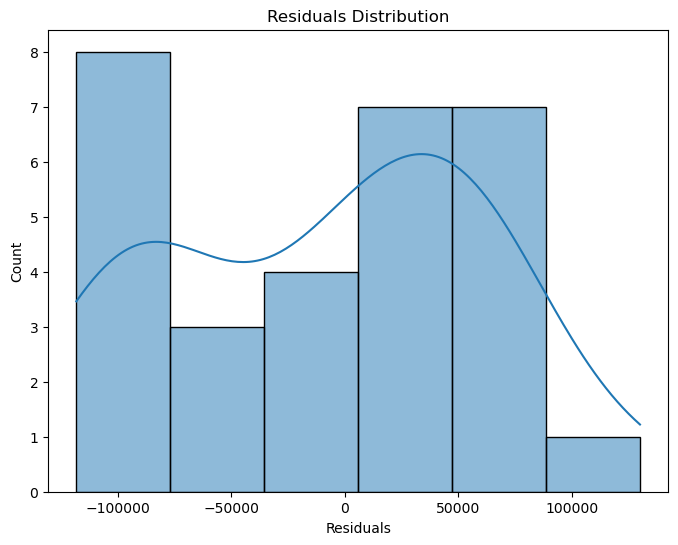

In [14]:
# Plot residuals
residuals = y_test - y_pred
plt.figure(figsize=(8,6))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.show()